## IMPORTS

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
%matplotlib inline

## GETTING DATASET

Original dataset has not header row, so we cannot take the first dataset line as the header. Therefore, we are going to assign an initial name to every column.



In [38]:
file_path = './input/iris_dataset.csv'
dataset = pd.read_csv(file_path, header=None)

dataset.rename(columns={0: 'Sepal length', 1: 'Sepal width', 2: 'Petal length', 3: 'Petal width', 4: 'Class'}, inplace=True)

#dataset.head()

## EXPLORING DATA
The following step is going into the dataset. The first step is studying relationships between the predictors and the predictable variable. To do that, we can use *kdeplot* function in order to see the distribution of every predictors according to their Iris class.

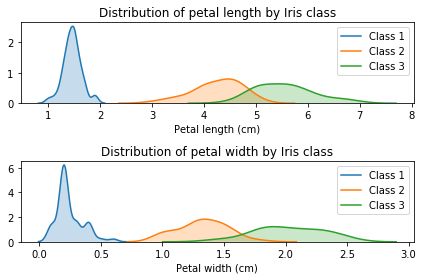

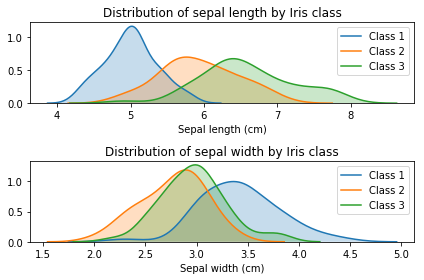

In [39]:
class_1 = dataset[dataset['Class'] == 'Iris-setosa']
class_2 = dataset[dataset['Class'] == 'Iris-versicolor']
class_3 = dataset[dataset['Class'] == 'Iris-virginica']

plt.subplot(211)
sns.kdeplot(class_1['Petal length'], label='Class 1', shade=True)
sns.kdeplot(class_2['Petal length'], label='Class 2', shade=True)
sns.kdeplot(class_3['Petal length'], label='Class 3', shade=True)
plt.xlabel('Petal length (cm)')
plt.title('Distribution of petal length by Iris class')

plt.subplot(212)
sns.kdeplot(class_1['Petal width'], label='Class 1', shade=True)
sns.kdeplot(class_2['Petal width'], label='Class 2', shade=True)
sns.kdeplot(class_3['Petal width'], label='Class 3', shade=True)
plt.xlabel('Petal width (cm)')
plt.title('Distribution of petal width by Iris class')

plt.tight_layout()
plt.figure()

plt.subplot(211)
sns.kdeplot(class_1['Sepal length'], label='Class 1', shade=True)
sns.kdeplot(class_2['Sepal length'], label='Class 2', shade=True)
sns.kdeplot(class_3['Sepal length'], label='Class 3', shade=True)
plt.xlabel('Sepal length (cm)')
plt.title('Distribution of sepal length by Iris class')

plt.subplot(212)
sns.kdeplot(class_1['Sepal width'], label='Class 1', shade=True)
sns.kdeplot(class_2['Sepal width'], label='Class 2', shade=True)
sns.kdeplot(class_3['Sepal width'], label='Class 3', shade=True)
plt.xlabel('Sepal width (cm)')
plt.title('Distribution of sepal width by Iris class')

plt.tight_layout()

As we can see, *petal length* and *petal width* are strongly related to Iris classes. Particularly, Iris *class 1*. This shows up that knowing *petal length* or *petal width*, we could predict whether it is Iris *class 1* or not. 

## Preparing dataset
Firstly, we have to check out for missing values. We will do that in two diffenrent ways:

    1. Heatmap. 
    2. Dataset summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal length    150 non-null float64
Sepal width     150 non-null float64
Petal length    150 non-null float64
Petal width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


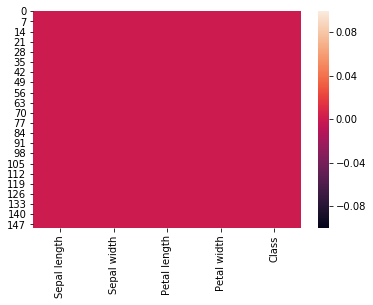

In [40]:
# Missing values
sns.heatmap(dataset.isnull())
dataset.info()

As we can appreciate, there is not any missing value in the dataset. So the next step is prepare the dataset to train the model. Preparing data type is one of the firts thing to be done. Let's which data types we have in the dataset.

In [41]:
dataset.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class            object
dtype: object

As we can see, all data is a numeric value but *Class* column. So, one of the way to face this issue is using *One-Hot Encoding* technique. 

In [42]:
le = LabelEncoder()
dataset['Class_encoded'] = le.fit_transform(dataset['Class'])

In [43]:
dataset.head()

,Sepal length,Sepal width,Petal length,Petal width,Class,Class_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Spliting training and testing data
In order to validate the model, we need to test its predictions against an already known output. To do that, we need to split the total dataset into a training dataset and a testing dataset. This proccedure can be easily done by *train_test_split* function.

In [69]:
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
target_feature = 'Class_encoded'

X = dataset[features]
Y = dataset[target_feature]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

## Choosing and training the model
Once we have splitted the dataset, we can start choosing and training the model with the training dataset.

### Option 1: Decision Tree Classifier
The first model is a Decision Tree Classifier. This is one of the most simple model to start with. The score achieved with this option is **98%**.

In [70]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      0.93      0.96        14
          2       0.92      1.00      0.96        12

avg / total       0.98      0.97      0.97        38



### Option 2: Random Forest Classifier
The first model is a Random Forest Classifier. This is a little bit complex than the first one. The score achieved with this option is **95%**.

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.88      1.00      0.93        14
          2       1.00      0.83      0.91        12

avg / total       0.95      0.95      0.95        38



### Option 3: XGBClassifier
The first model is a XGB Classifier. This is a little bit complex than the first one. The score achieved with this option is **98%**.

In [72]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.93      1.00      0.97        14
          2       1.00      0.92      0.96        12

avg / total       0.98      0.97      0.97        38



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Option 4: Gradient Boosting Classifier
The first model is a Gradient Boosting Classifier. This is a little bit complex than the first one. The score achieved with this option is **100%**.

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        38

